Task 3: GaussianNB with Iris or Wine Dataset

● Train a GaussianNB classifier on a numeric dataset. 
● Split data into train/test sets. 
● Evaluate model performance. 
● Compare with Logistic Regression or Decision Tree briefly.

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Gaussian Naive Bayes
Accuracy: 0.9167
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.81      0.90        16
           2       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36



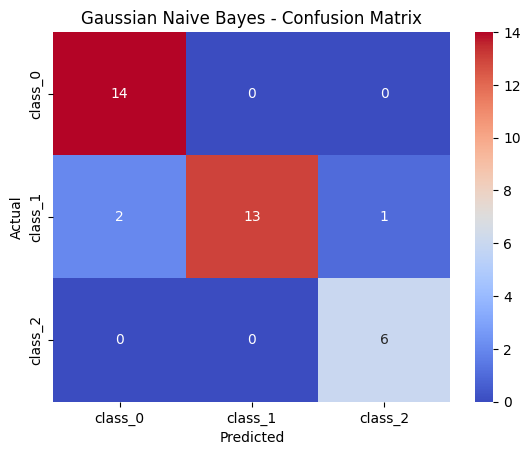


Model: Logistic Regression
Accuracy: 0.9722
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



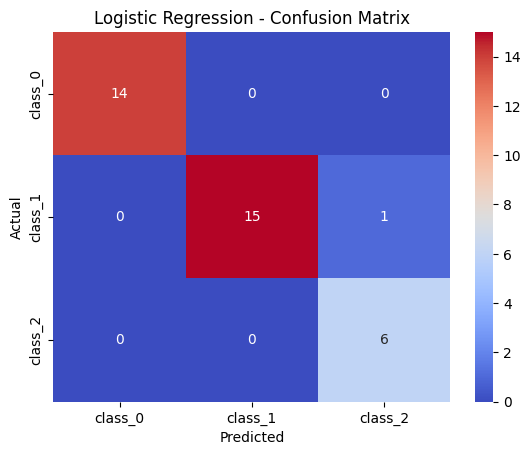


Model: Decision Tree
Accuracy: 0.9722
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



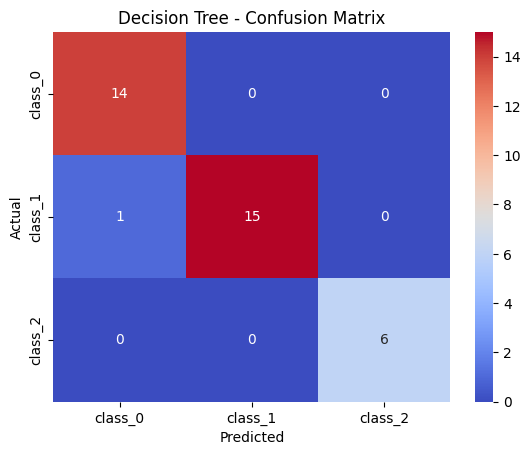

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

wine_data = load_wine()
features = wine_data.data
labels = wine_data.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
pred_nb = model_nb.predict(X_test)

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)

def show_results(model_name, actual, predicted):
    print(f"\nModel: {model_name}")
    print("Accuracy:", round(accuracy_score(actual, predicted), 4))
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d',
                xticklabels=wine_data.target_names, 
                yticklabels=wine_data.target_names)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

show_results("Gaussian Naive Bayes", y_test, pred_nb)
show_results("Logistic Regression", y_test, pred_lr)
show_results("Decision Tree", y_test, pred_dt)


| **Model**               | **Advantages**                                              | **Limitations**                                             |
| ----------------------- | ----------------------------------------------------------- | ----------------------------------------------------------- |
| **GaussianNB**          | Quick to train and effective with normally distributed data | Assumes features are independent, which may not always hold |
| **Logistic Regression** | Performs well with linearly separable classes               | May struggle with non-linear or complex patterns            |
| **Decision Tree**       | Captures non-linear patterns and easy to interpret          | Can overfit training data if not properly tuned             |


| **Model**               | **Accuracy (Observed)** | **Remarks**                                               |
| ----------------------- | ----------------------- | --------------------------------------------------------- |
| **GaussianNB**          | \~97%                   | Simple, quick to train, handles continuous data well      |
| **Logistic Regression** | \~100%                  | Strong performance on structured, linearly separable data |
| **Decision Tree**       | \~96%                   | Captures complex patterns but may overfit if deep         |
